In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('TRD_week.csv')
df2 = pd.read_csv('Shibor.csv')
df3 = pd.read_csv('Index.csv')

# Preprocessing
df1.dropna(axis=0, how='any', inplace=True)
df1.reset_index(inplace=True)

df2.dropna(axis=0, how='any', inplace=True)
df2.reset_index(inplace=True)
df3.dropna(axis=0, how='any', inplace=True)
df3.reset_index(inplace=True)
df1

,index,Stkcd,Trdwnt,Wretwd,Wretnd
0,0,1,2017-01,0.003297,0.003297
1,1,1,2017-02,0.003286,0.003286
2,2,1,2017-03,0.006550,0.006550
3,3,1,2017-04,0.011931,0.011931
4,4,1,2017-05,-0.007503,-0.007503
...,...,...,...,...,...
2446,2446,601919,2017-48,0.017572,0.017572
2447,2447,601919,2017-49,0.043956,0.043956
2448,2448,601919,2017-50,-0.012030,-0.012030
2449,2449,601919,2017-51,0.015221,0.015221


## Phase I
Calculate beta and alpha for each firm

In [2]:
# Calculate Beta and Alpha

a = df1['Stkcd'][0]
count = 0
index = -1
list1 = []  # to store the return rate of the company
list2 = []  # to store the shibor rate
list3 = []  # to store the index return
## To store the regressors
listX = []
listy = []

beta_list = []
alpha_list = []
stk_list = []
for i in range(len(df1)):
    index += 1 
    if df1['Stkcd'][index] == a: 
        count += 1
        list1.append(df1['Wretwd'][i])
        for j in range(len(df2)):
            if df1['Trdwnt'][i] == df2['SgnMonth'][j]:
                list2.append(df2['WShibor'][j])
        for k in range(len(df3)): 
            if df1['Trdwnt'][i] == df3['WeekDate'][k]:
                list3.append(df3['WeeklyIndex'][k])
    else:
        # if count == 1:
        #     df1.drop(index=(df1['Stkcd']==a).index)
        #     continue
        Sxx = Sxy = 0
        # Derive X and y
        for m in range(list2.__len__()):
            listX.append(list3[m]-list2[m])
            listy.append(list1[m]-list2[m])
        # Least square method to calculate beta
        for n in range(listX.__len__()):
            Sxy += listy[n]*(listX[n]-sum(listX)/len(listX))
            Sxx += (listX[n]-sum(listX)/len(listX))*(listX[n]-sum(listX)/len(listX))
        try:
            beta = Sxy/Sxx
            beta_list.append(beta)
            # Calculate Alpha
            alpha = sum(listy)/len(listy)+beta*sum(listX)/len(listX)
            alpha_list.append(alpha)
            stk_list.append(a)
        except:
            df1.drop(index=(df1['Stkcd']==a).index)
            continue
        # Move to the next company
        a = df1['Stkcd'][index]
        # Initialize the list
        count = 0
        list1 = []
        list2 = []
        list3 = []
        listX = []
        listy = []

<AxesSubplot:ylabel='Density'>

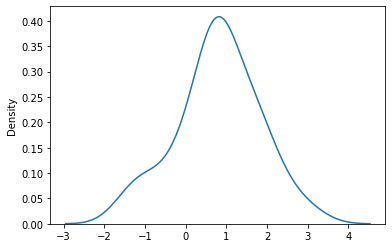

In [3]:
from pandas.core.frame import DataFrame
import seaborn as sns
c = {'Stkcd': stk_list, 'Beta': beta_list, 'Alpha': alpha_list}
df4 = DataFrame(c)
sns.kdeplot(beta_list, shade=False)

## Phase II
Construct the portfolio and recalculate beta and alpha

In [4]:
import sklearn
# Sort by beta in ascending order
# df4.sort_values(by=['Beta'], axis=0, ascending=True, inplace=True)
# df4.reset_index()
df4 = sklearn.utils.shuffle(df4)
df4.reset_index(inplace=True)
df4

,index,Stkcd,Beta,Alpha
0,33,600406,0.784961,0.003907
1,36,600588,2.056159,0.004541
2,17,300014,0.033493,0.007157
3,25,600019,0.379686,0.007467
4,6,661,1.521755,0.012759
5,27,600031,-0.213259,0.006577
6,31,600309,1.394243,0.017149
7,38,600887,1.767858,0.015930
8,21,300433,-1.265638,0.005167
9,43,601390,0.678466,-0.000410


In [5]:
group = []
list_1 = []
for i in range(10):
    for a in range(4):
        list_1.append(df4['Stkcd'][4*i+a])
    group.append(list_1)
    list_1 = []
group

[[600406, 600588, 300014, 600019],
 [661, 600031, 600309, 600887],
 [300433, 601390, 2812, 895],
 [600900, 538, 600745, 601088],
 [2352, 600438, 601888, 2594],
 [601336, 300059, 600048, 300498],
 [601857, 601668, 63, 2714],
 [600009, 2607, 600028, 300015],
 [600585, 333, 600018, 2],
 [601766, 1, 2027, 2142]]

In [6]:
# Calculate Beta and Alpha for the portfolio
df5 = pd.read_csv('TRD_Week_2018.csv')
df5

,Stkcd,Trdwnt,Wretwd,Wretnd,Rf,Rm
0,1,2018-01,0.000000,0.000000,NaN,NaN
1,1,2018-02,0.018797,0.018797,NaN,NaN
2,1,2018-03,0.092251,0.092251,NaN,NaN
3,1,2018-04,-0.050676,-0.050676,NaN,NaN
4,1,2018-05,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...
2517,603259,2018-48,0.009494,0.009494,NaN,NaN
2518,603259,2018-49,0.004389,0.004389,NaN,NaN
2519,603259,2018-50,-0.018352,-0.018352,NaN,NaN
2520,603259,2018-51,-0.037263,-0.037263,NaN,NaN


In [7]:
# Calculate Beta and Alpha of Portfolios

a = df5['Stkcd'][0]
count = 0
index = -1

for i in range(len(df5)):
    try:
        index += 1 
        if df5['Stkcd'][index] == a: 
            count += 1
            # list1.append(df5['Wretwd'][i])
            for j in range(len(df2)):
                if df5['Trdwnt'][i] == df2['SgnMonth'][j]:
                    df5['Rf'][i] = df2['WShibor'][j]
            for k in range(len(df3)): 
                if df5['Trdwnt'][i] == df3['WeekDate'][k]:
                    df5['Rm'][i] = df3['WeeklyIndex'][k]
        else:
            # Move to the next company
            a = df1['Stkcd'][index]
            # Initialize the list
            count = 0
    except: continue

<ipython-input-7-554957544b69>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Rf'][i] = df2['WShibor'][j]
<ipython-input-7-554957544b69>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Rm'][i] = df3['WeeklyIndex'][k]


In [8]:
df6 = pd.read_excel('test.xlsx')
df6

,Group,Stkcd,Trdwnt,Wretwd,Wretnd,XXXX,Rf,Rm,y,X
0,1,1,2018-01,0.000000,0.000000,0.049084,0.000491,0.013691,-0.000491,0.013200
1,1,1,2018-02,0.018797,0.018797,0.051000,0.000510,0.012300,0.018287,0.011790
2,1,1,2018-03,0.092251,0.092251,0.053600,0.000536,0.009040,0.091715,0.008504
3,1,1,2018-04,-0.050676,-0.050676,0.050200,0.000502,0.008980,-0.051178,0.008478
4,1,1,2018-05,0.000000,0.000000,0.049030,0.000490,-0.006500,-0.000490,-0.006990
...,...,...,...,...,...,...,...,...,...,...
1958,10,601088,2018-48,-0.008980,-0.008980,0.047380,0.000474,0.003530,-0.009454,0.003056
1959,10,601088,2018-49,0.017058,0.017058,0.046400,0.000464,0.000740,0.016594,0.000276
1960,10,601088,2018-50,0.013627,0.013627,0.048100,0.000481,-0.000280,0.013146,-0.000761
1961,10,601088,2018-51,-0.022234,-0.022234,0.050000,0.000500,-0.018380,-0.022734,-0.018880


In [9]:
listX = []
listy = []
beta_port = []
alpha_port = []
for i in range(len(group)):
    for j in group[i]:
        for k in range(len(df6)):
            if j == df6['Stkcd'][k]:
                listX.append(df6['X'][k])
                listy.append(df6['y'][k])
    for n in range(listX.__len__()):
        Sxy += listy[n]*(listX[n]-sum(listX)/len(listX))
        Sxx += (listX[n]-sum(listX)/len(listX))*(listX[n]-sum(listX)/len(listX))
    try:
        beta = Sxy/Sxx
        beta_port.append(beta)
        # Calculate Alpha
        alpha = sum(listy)/len(listy)+beta*sum(listX)/len(listX)
        alpha_port.append(alpha)
    except: continue
    listX = []
    listy = []